In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null datetime64[ns]
gender               12043 non-null object
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 n

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [6]:
df.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [8]:
duplicate =df.duplicated()
df[duplicate].sum()

status               0.0
card_present_flag    0.0
bpay_biller_code     0.0
account              0.0
currency             0.0
long_lat             0.0
txn_description      0.0
merchant_id          0.0
merchant_code        0.0
first_name           0.0
balance              0.0
date                 0.0
gender               0.0
age                  0.0
merchant_suburb      0.0
merchant_state       0.0
extraction           0.0
amount               0.0
transaction_id       0.0
country              0.0
customer_id          0.0
merchant_long_lat    0.0
movement             0.0
dtype: float64

In [10]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [20]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [23]:
df['card_present_flag'].value_counts()

1.0    6194
0.0    1523
Name: card_present_flag, dtype: int64

In [22]:
df[['customer_id','age','balance','amount','txn_description']]

,customer_id,age,balance,amount,txn_description
0,CUS-2487424745,26,35.39,16.25,POS
1,CUS-2487424745,26,21.20,14.19,SALES-POS
2,CUS-2142601169,38,5.71,6.42,POS
3,CUS-1614226872,40,2117.22,40.90,SALES-POS
4,CUS-2487424745,26,17.95,3.25,SALES-POS
5,CUS-2688605418,20,1705.43,163.00,PAYMENT
6,CUS-4123612273,43,1248.36,61.06,SALES-POS
7,CUS-4123612273,43,1232.75,15.61,POS
8,CUS-3026014945,27,213.16,19.25,POS
9,CUS-2031327464,40,466.58,21.00,INTER BANK


## Consider 'pay/salary' option for salaries 

In [29]:
df_salaries = df[df["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head()

,card_present_flag,merchant_code,balance,age,amount
customer_id,,,,,
CUS-1005756958,NaN,0.0,4718.665385,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,34,3903.73


In [30]:
#df[df['customer_id']=='CUS-1005756958']

##  From here we can analyze different parameters 

In [36]:
df_salaries.describe()

,card_present_flag,merchant_code,balance,age,amount
count,0.0,100.0,100.000000,100.000000,100.00000
mean,NaN,0.0,18820.063327,31.770000,2297.27390
std,NaN,0.0,35494.157715,11.544254,1397.78397
min,NaN,0.0,1755.892308,18.000000,576.00000
25%,NaN,0.0,5414.601875,22.000000,1153.31000
50%,NaN,0.0,8319.729524,29.500000,1949.43000
75%,NaN,0.0,14370.677582,39.250000,2886.72500
max,NaN,0.0,264128.046667,78.000000,8835.98000


## Compute annual salaries

In [37]:
salaries = []

for customer_id in df["customer_id"]:
    salaries.append(int(df_salaries.loc[customer_id]["amount"]))
    
df["annual_salary"] = salaries

In [38]:
df_customer=df.groupby('customer_id').mean()
df_customer.head()

,card_present_flag,merchant_code,balance,age,amount,annual_salary
customer_id,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,53,222.862603,970
CUS-1117979751,0.826923,0.0,9829.929000,21,339.843700,3578
CUS-1140341822,0.815385,0.0,5699.212250,28,212.632500,1916
CUS-1147642491,0.750000,0.0,9032.841186,34,245.600169,1711
CUS-1196156254,0.785276,0.0,22272.433755,34,147.145796,3903


In [51]:
df_customer=df_customer.drop(['merchant_code'],axis=1)

## Visualization

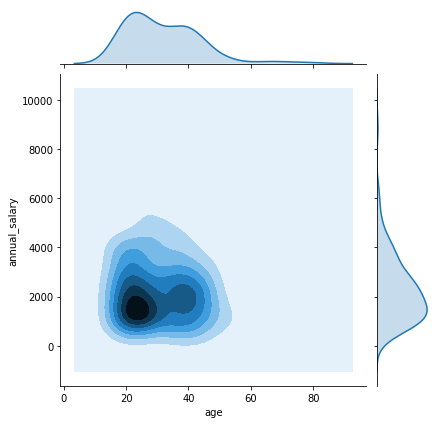

In [52]:
sns.jointplot(x='age',y='annual_salary',data=df_customer,kind='kde')

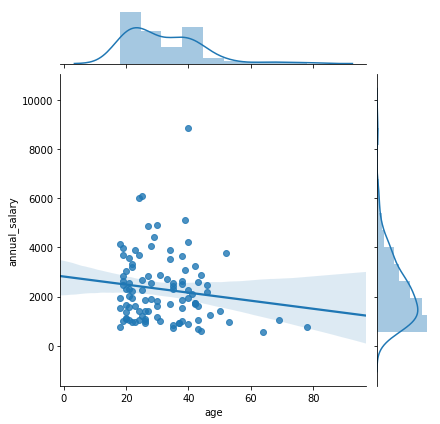

In [56]:
sns.jointplot(x='age',y='annual_salary',data=df_customer,kind='reg')

In [54]:
df_customer.corr()

,card_present_flag,balance,age,amount,annual_salary
card_present_flag,1.000000,0.011628,-0.001336,-0.281077,-0.147631
balance,0.011628,1.000000,0.231963,0.272791,0.205643
age,-0.001336,0.231963,1.000000,0.175525,-0.135227
amount,-0.281077,0.272791,0.175525,1.000000,0.289440
annual_salary,-0.147631,0.205643,-0.135227,0.289440,1.000000


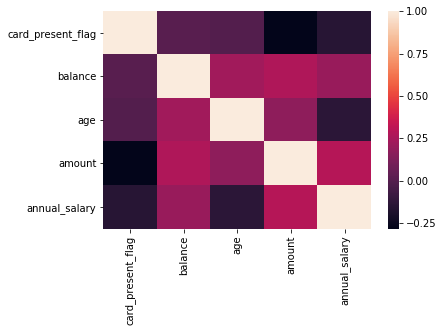

In [55]:
sns.heatmap(df_customer.corr())

## Predective Analysis

In [59]:
N_train = int(len(df_customer)*0.8)
X_train = df_customer.drop("annual_salary", axis=1).iloc[:N_train]
Y_train = df_customer["annual_salary"].iloc[:N_train]
X_test = df_customer.drop("annual_salary", axis=1).iloc[N_train:]
Y_test = df_customer["annual_salary"].iloc[N_train:] 

In [60]:
linear_reg = LinearRegression()


In [62]:
linear_reg.fit(X_train, Y_train)
linear_reg.score(X_train, Y_train)

0.23295376366257825

In [63]:
linear_reg.predict(X_test)

array([1993.98473311, 2867.39066481, 1944.95959591, 1806.85984885,
       2226.35045442, 2075.34697175, 1813.02987337, 5388.67435983,
       1902.35351608, 2191.90445145, 1713.48134178, 2854.40519949,
       2094.77781158, 3815.34342881, 2249.92922822, 1768.80816189,
       2095.02988288, 1515.18425875, 1782.72752537, 2481.2898546 ])

In [64]:
linear_reg.score(X_test, Y_test)

-0.31694234980745595

## Decision Tree - Classification and Regression

In [65]:
df_cat = df[["txn_description", "gender", "age", "merchant_state", "movement"]]


In [67]:
pd.get_dummies(df_cat).head()

,age,txn_description_INTER BANK,txn_description_PAY/SALARY,txn_description_PAYMENT,txn_description_PHONE BANK,txn_description_POS,txn_description_SALES-POS,gender_F,gender_M,merchant_state_ACT,merchant_state_NSW,merchant_state_NT,merchant_state_QLD,merchant_state_SA,merchant_state_TAS,merchant_state_VIC,merchant_state_WA,movement_credit,movement_debit
0,26,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1
1,26,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1
2,38,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
3,40,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
4,26,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1


In [68]:
N_train = int(len(df)*0.8)
X_train = pd.get_dummies(df_cat).iloc[:N_train]
Y_train = df["annual_salary"].iloc[:N_train]
X_test = pd.get_dummies(df_cat).iloc[N_train:]
Y_test = df["annual_salary"].iloc[N_train:]

##  Classification

In [69]:
decision_tree_class = DecisionTreeClassifier()


In [70]:

decision_tree_class.fit(X_train, Y_train)
decision_tree_class.score(X_train, Y_train)


0.7882499481004774

In [71]:
decision_tree_class.predict(X_test)

array([1013, 1043, 4132, ..., 4054, 1043,  996])

In [72]:
decision_tree_class.score(X_test, Y_test)

0.755085097550851

## Regression


In [73]:
decision_tree_reg = DecisionTreeRegressor()

In [74]:
decision_tree_reg.fit(X_train, Y_train)
decision_tree_reg.score(X_train, Y_train)

0.7468978726536879

In [75]:
decision_tree_reg.predict(X_test)


array([1226.42857143, 1043.        , 4132.        , ..., 3345.04761905,
       1043.        , 1626.        ])

In [76]:
decision_tree_reg.score(X_test, Y_test)


0.6807158887508269

# Hence we Conclude that decision_tree_classification shows better results